### 데이터 분석

In [12]:
import pandas as pd
path = '../../데이터/일별평균대기오염도_2023.csv'
dust_df = pd.read_csv(path, encoding="cp949")

In [14]:
# 일부만 출력
dust_df.head(1)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20230101,강남구,0.024,0.024,0.6,0.004,52.0,36.0


In [15]:
# 열 이름 출력
dust_df.columns

Index(['측정일시', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스농도(ppm)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)'],
      dtype='object')

In [17]:
# '측정일시', '측정소명','미세먼지(㎍/㎥)' 열만 출력
dust_df2 = dust_df[['측정일시', '측정소명','미세먼지농도(㎍/㎥)']]
dust_df2.head(1)

,측정일시,측정소명,미세먼지농도(㎍/㎥)
0,20230101,강남구,52.0


In [18]:
# 열 이름 수정
dust_df2.columns = ['날짜', '위치', '미세먼지']
dust_df2.head(1)

,날짜,위치,미세먼지
0,20230101,강남구,52.0


In [19]:
# 위치가 '강동구'인 값들만 반환
dust_gu = dust_df2[dust_df2['위치']=='강동구']
dust_gu.head(1)

,날짜,위치,미세먼지
1,20230101,강동구,56.0


In [20]:
dust_gu.index = pd.to_datetime(dust_gu['날짜'].apply(str))
dust_gu

,날짜,위치,미세먼지
날짜,,,
2023-01-01,20230101,강동구,56.0
2023-01-02,20230102,강동구,26.0
2023-01-03,20230103,강동구,34.0
2023-01-04,20230104,강동구,37.0
2023-01-05,20230105,강동구,52.0
...,...,...,...
2023-12-27,20231227,강동구,68.0
2023-12-28,20231228,강동구,49.0
2023-12-29,20231229,강동구,43.0


### 시각화

In [24]:
# 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib 설정 변경
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# matplotlib에 폰트 적용
plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*


In [68]:
path = '../../데이터/2018년_2차_졸업생의 진로 현황(전체).xlsx'
graduation = pd.read_excel(path, sheet_name=1)

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [69]:
# 해당 열만 반환: ['지역', '정보공시 \n 학교코드', '학교명', '졸업자.2', '(특수목적고)과학고 진학자.2',  '(특수목적고)외고ㆍ국제고 진학자.2']
graduation = graduation[['지역', '정보공시 \n 학교코드', '학교명', '졸업자.2', '(특수목적고)과학고 진학자.2',  '(특수목적고)외고ㆍ국제고 진학자.2']] 

In [70]:
# 해당 열 이름 변경
# 과학고: 과학고 진학자, 외고: 외고 진학자
graduation.columns = ['지역', '학교코드', '학교명', '졸업자', '과학고', '외고'] 

In [71]:
# 첫번째 행 제거 (필요없는 행)
graduation = graduation.drop(0)

In [72]:
# na값이 있는 행을 제거한다.
graduation = graduation.dropna()

In [73]:
# 타입 출력
graduation.dtypes

지역      object
학교코드    object
학교명     object
졸업자     object
과학고     object
외고      object
dtype: object

In [74]:
graduation['졸업자'] = pd.to_numeric(graduation['졸업자'])
graduation['과학고'] = pd.to_numeric(graduation['과학고'])
graduation['외고'] = pd.to_numeric(graduation['외고'])

In [75]:
# 타입 출력
graduation.dtypes

지역      object
학교코드    object
학교명     object
졸업자      int64
과학고      int64
외고       int64
dtype: object

In [76]:
# 데이터 인덱스 초기화
graduation.reset_index(drop=True, inplace=True)

In [77]:
# 특목고 항목 추가
graduation['특목고'] = graduation['과학고'] + graduation['외고']
graduation['특목고_비율'] = graduation['특목고'] / graduation['졸업자'] * 100
graduation.head()

,지역,학교코드,학교명,졸업자,과학고,외고,특목고,특목고_비율
0,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,234,4,5,9,3.846154
1,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,172,0,8,8,4.651163
2,서울특별시 강남구,S010000698,개원중학교,214,2,9,11,5.140187
3,서울특별시 서초구,S010000700,경원중학교,310,5,4,9,2.903226
4,서울특별시 강남구,S010000701,구룡중학교,256,3,4,7,2.734375


In [78]:
# 특목고 비율로 정렬
sp_num_20_df = graduation.sort_values('특목고', ascending=False)[:20]
sp_num_20_df.head(5)

,지역,학교코드,학교명,졸업자,과학고,외고,특목고,특목고_비율
1664,경기도 가평군,S090005419,청심국제중학교,100,0,48,48,48.000000
1427,경기도 안양시 동안구,S090003039,평촌중학교,441,8,34,42,9.523810
1407,경기도 과천시,S090003014,과천문원중학교,387,3,35,38,9.819121
292,서울특별시 광진구,S010002151,대원국제중학교,164,5,32,37,22.560976
1377,경기도 안산시 상록구,S090002694,성안중학교,309,32,4,36,11.650485


#### BAR 그래프

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYL

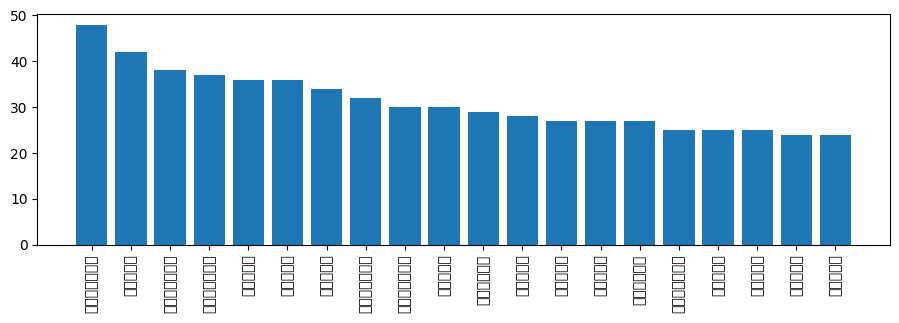

In [79]:
# 특목고 진학수 막대그래프
plt.figure(figsize=(11, 3))

# bar graph => bar(x,y)
plt.bar(sp_num_20_df['학교명'], sp_num_20_df['특목고'])
plt.xticks(rotation=90)

plt.show()

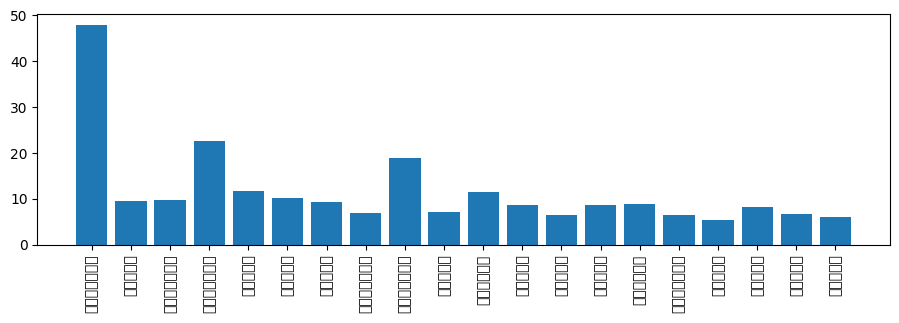

In [80]:
# 특목고 진학률 막대그래프
plt.figure(figsize=(11, 3))

# bar graph => bar(x,y)
plt.bar(sp_num_20_df['학교명'], sp_num_20_df['특목고_비율'])
plt.xticks(rotation=90)

plt.show()

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYL

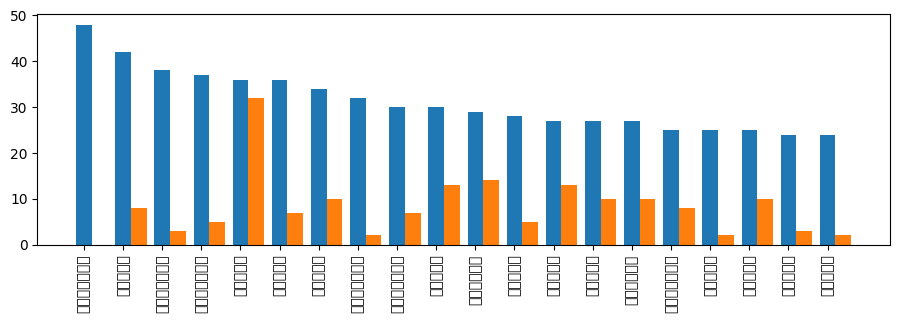

In [81]:
# 과고, 특목고 진학수 막대그래프 (데이터 2개)
plt.figure(figsize=(11, 3))

# bar graph => bar(x,y)
plt.bar(range(0, len(sp_num_20_df)), sp_num_20_df['특목고'], width=0.4)
# bar 2개일 때, 겹치지 않게 하기 위해 x축에 0.4를 더해줌
# range(0, len(sp_num_20_df)) => list 이므로 0.4를 더하기 위해 series로 변환
plt.bar(pd.Series(range(0, len(sp_num_20_df))) + 0.4, sp_num_20_df['과학고'], width=0.4)

plt.xticks(range(0, len(sp_num_20_df)), sp_num_20_df['학교명'], rotation=90)

plt.show()

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYL

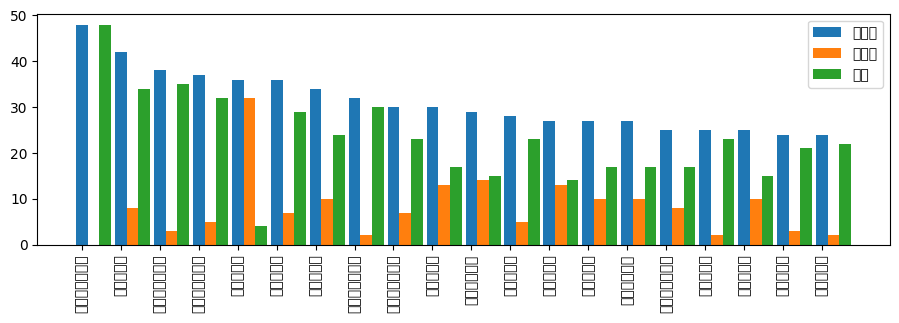

In [82]:
# 외고, 과학고, 특목고 진학수 막대그래프 (데이터 3개)
plt.figure(figsize=(11, 3))

x = range(0, len(sp_num_20_df))
plt.bar(x, sp_num_20_df['특목고'], width=0.3, label='특목고')
plt.bar(pd.Series(x) + 0.3, sp_num_20_df['과학고'], width=0.3, label='과학고')
plt.bar(pd.Series(x) + 0.6, sp_num_20_df['외고'], width=0.3, label='외고')
plt.legend()

plt.xticks(x, sp_num_20_df['학교명'], rotation=90)

plt.show()

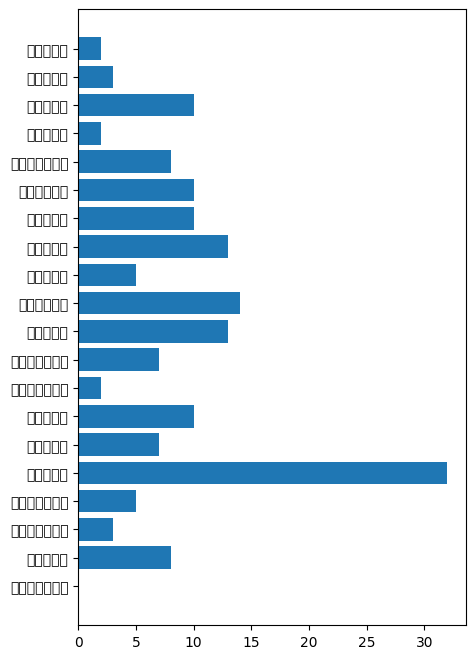

In [83]:
# 세로방향 막대그래프
plt.figure(figsize=(5, 8))

# barh(y, x)
plt.barh(sp_num_20_df['학교명'], sp_num_20_df['과학고'])

plt.show()

#### scatter (산포도)

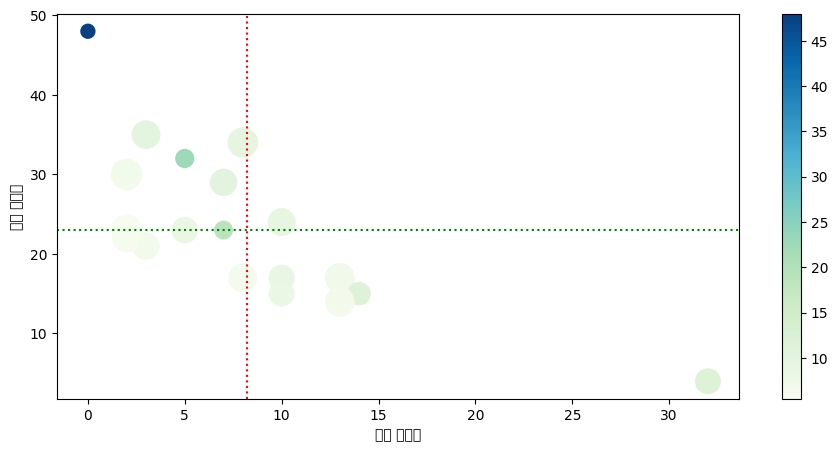

In [91]:
# scatter => 산포도
# scatter(x, y)

# series.mean() => 평균값 구하기
# plt.scatter(x, y, c = 색상으로 표현하고 싶은 수치를 가진 시리즈, s = 점 사이즈를 가진 시리즈)

plt.figure(figsize=(11, 5))

plt.scatter(sp_num_20_df['과학고'], sp_num_20_df['외고'], c=sp_num_20_df['특목고_비율'], cmap='GnBu', s=sp_num_20_df['졸업자'])

plt.colorbar() # c 로 설정한 수치의 색상표 출력

plt.axvline(sp_num_20_df['과학고'].mean(), color='red', ls=':')
plt.axhline(sp_num_20_df['외고'].mean(), color='green', ls=':')

plt.xlabel('과고 진학자')
plt.ylabel('외고 진학자')

plt.show()

#### countplot

- seaborn
    - matplotlib 의 추가 패키지
    - matplotlib 의 옵션이 다 들어감
    - 좀 더 편하게 여러 그래프를 그리게 해줌
- countplot => sns.countplot(data=df, x='카운팅 할 컬럼명', hue='카운팅 할 컬럼명2'
    - hue는 1개만 지정 가능
    - 단점 : 커스터마이징이 어렵다

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SY

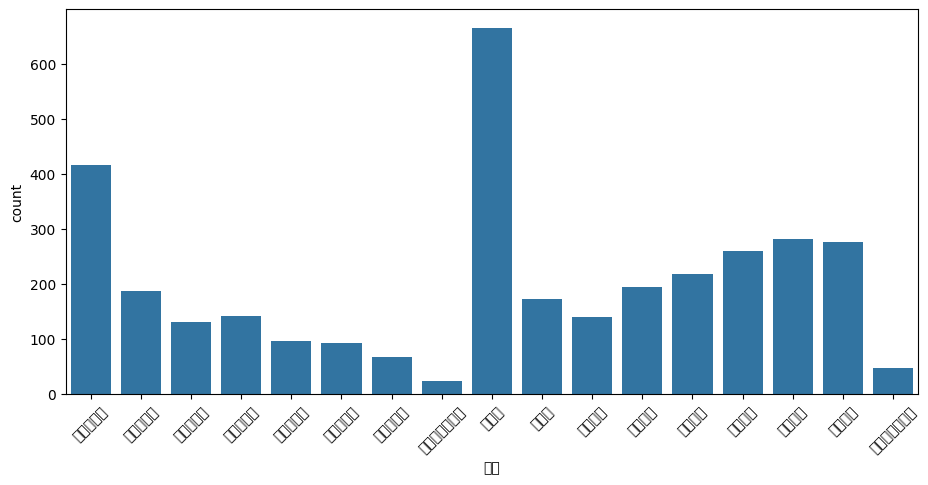

In [85]:
import seaborn as sns

def temp(x):
    return x.split(' ')[0]

# 시도별 학교 개수
graduation['시도'] = graduation['지역'].apply(temp)

plt.figure(figsize=(11, 5))
sns.countplot(data=graduation, x='시도')
plt.xticks(rotation=45)
plt.show()

#### boxplot

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SY

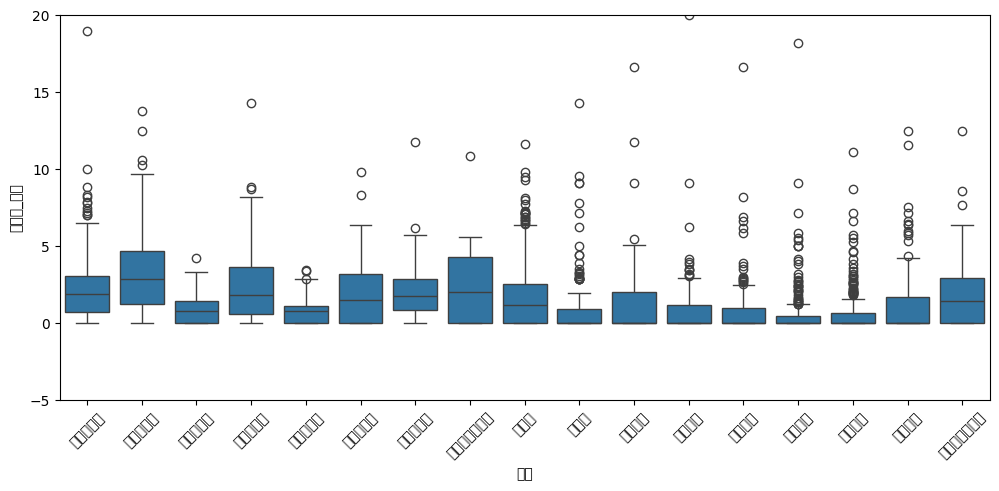

In [86]:
# boxplot => boxplot(data=df, x='카테고리가 될 컬럼명', y='수치가 될 컬럼명')

# 시도별(카테고리) 특목고 진학률(수치) 체크

plt.figure(figsize=(12, 5))

sns.boxplot(data=graduation, x='시도', y='특목고_비율')
plt.xticks(rotation=45)

plt.ylim(-5, 20)  # y축 최소, 최대값 지정
#plt.xlim(5, 13)  # x

plt.show()

#### displot

/var/folders/6n/6zgw64gd1bz797x8_23k0z7h0000gn/T/ipykernel_83910/3997430608.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seoul_df['졸업자'], label='서울 졸업자 수')
/var/folders/6n/6zgw64gd1bz797x8_23k0z7h0000gn/T/ipykernel_83910/3997430608.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gg_

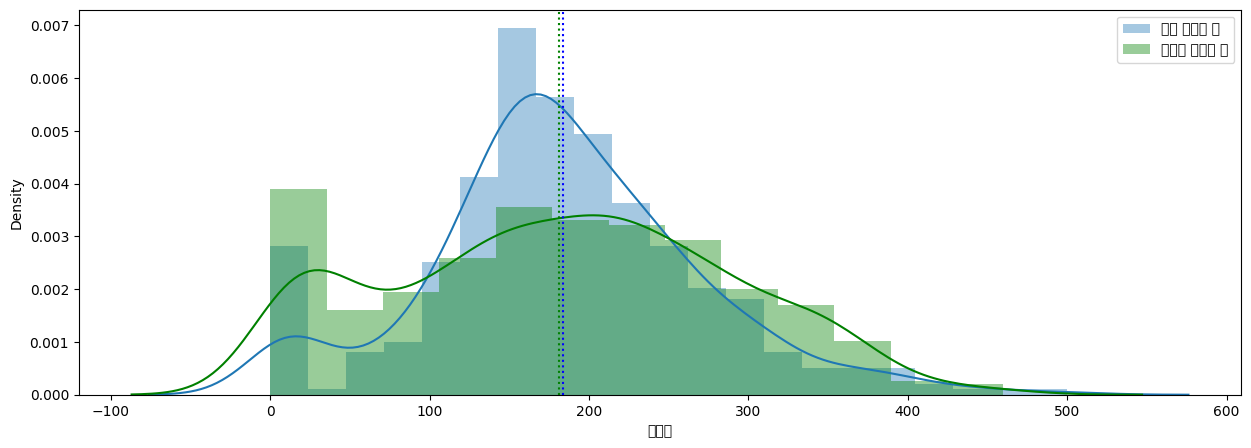

In [87]:
# Q. 서울특별시와 경기도의 졸업생 데이터 분포도 비교

# 서울, 경기도로 필터링
seoul_df = graduation[graduation['시도']=='서울특별시']
gg_df = graduation[graduation['시도']=='경기도']

# 그래프 그리기
plt.figure(figsize=(15, 5))

sns.distplot(seoul_df['졸업자'], label='서울 졸업자 수')
sns.distplot(gg_df['졸업자'], color='green', label='경기도 졸업자 수')
plt.axvline(seoul_df['졸업자'].mean(), color='blue', ls=':')
plt.axvline(gg_df['졸업자'].mean(), color='green', ls=':')
plt.legend()

plt.show()

In [89]:
graduation

,지역,학교코드,학교명,졸업자,과학고,외고,특목고,특목고_비율,시도
0,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,234,4,5,9,3.846154,서울특별시
1,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,172,0,8,8,4.651163,서울특별시
2,서울특별시 강남구,S010000698,개원중학교,214,2,9,11,5.140187,서울특별시
3,서울특별시 서초구,S010000700,경원중학교,310,5,4,9,2.903226,서울특별시
4,서울특별시 강남구,S010000701,구룡중학교,256,3,4,7,2.734375,서울특별시
...,...,...,...,...,...,...,...,...,...
3417,제주특별자치도 제주시,S170000838,오름중학교,193,0,5,5,2.590674,제주특별자치도
3418,제주특별자치도 제주시,S170000844,탐라중학교,298,1,1,2,0.671141,제주특별자치도
3419,제주특별자치도 제주시,S170000512,제주영지학교,12,0,0,0,0.000000,제주특별자치도
3420,제주특별자치도 제주시,S170000513,제주영송학교,21,0,0,0,0.000000,제주특별자치도


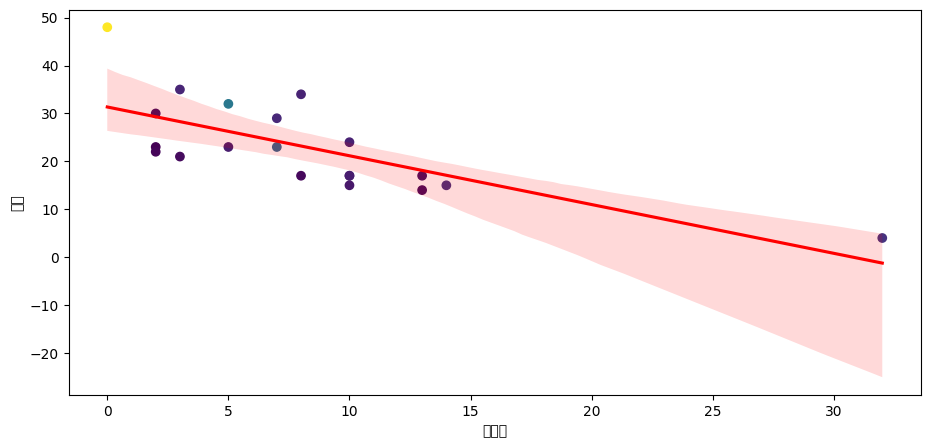

In [93]:
# scatter + sns.regplot()
# sns.regplot() => 회귀선(추세선) 그려진 산포도 출력
#               => 보통 산포도는 scatter를 이용한다 (옵션이 더 많아서) => regplot()의 옵션 중 scatter=False를 설정하여 점을 해제함

plt.figure(figsize=(11, 5))

plt.scatter(sp_num_20_df['과학고'], sp_num_20_df['외고'], c=sp_num_20_df['특목고_비율'])
sns.regplot(data=sp_num_20_df, x='과학고', y='외고', scatter=False, color='red')  # 회귀선(추세선) 출력

plt.show()

#### pairplot

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from 

/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  func(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/Users/macbook-0042/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/Users/macbook-0042/Library/Python/3

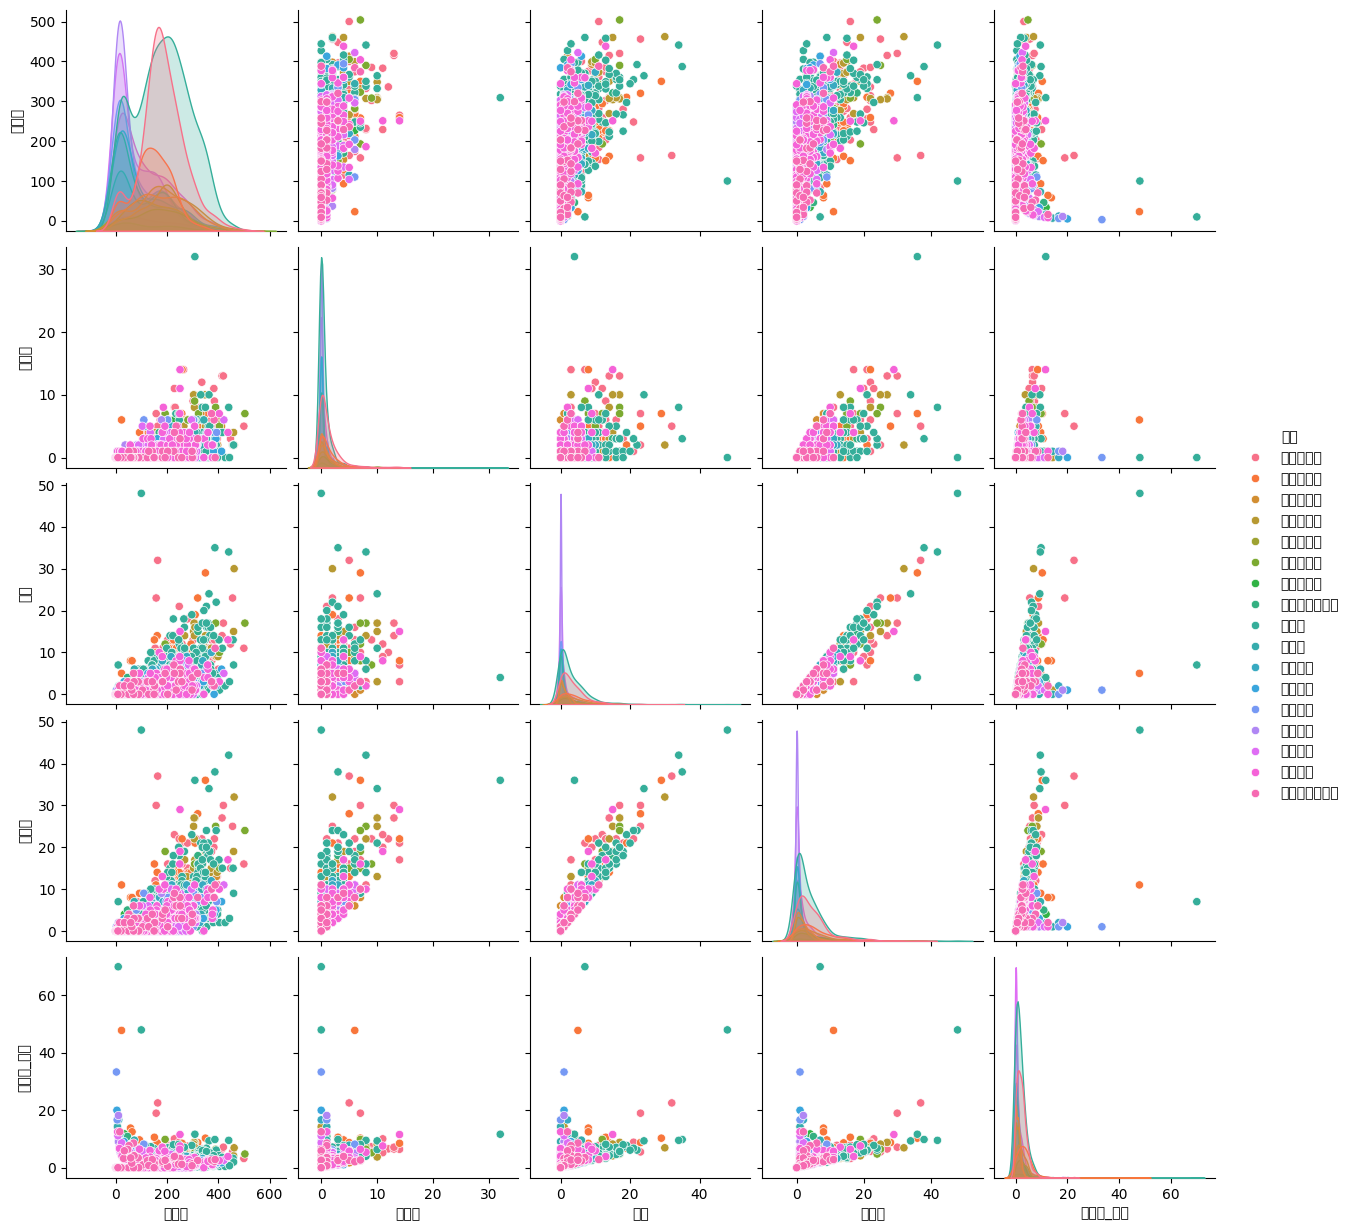

In [98]:
# pairplot => dataframe 안의 연속적인 숫자 데이터 간 관계를 모두 보여 줌
sns.pairplot(graduation, hue='시도')